In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.layers import Dense, Flatten, Reshape 
from tensorflow.keras.optimizers import SGD

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("The Shape of X_train: ", X_train.shape)
print("The Shape of y_train: ", y_train.shape)
print("The Shape of X_test: ", X_test.shape)
print("The Shape of y_test: ", y_test.shape)

The Shape of X_train:  (60000, 28, 28)
The Shape of y_train:  (60000,)
The Shape of X_test:  (10000, 28, 28)
The Shape of y_test:  (10000,)


In [5]:
print(X_train[0].max())
print(X_train[0].min())

255
0


In [6]:
X_train = X_train / 255
X_test = X_test / 255

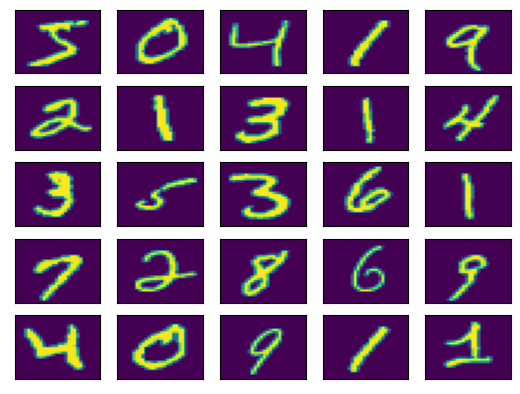

In [7]:
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(X_train[k], aspect='auto')
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        k += 1

plt.show()

In [9]:
noise_sample = GaussianNoise(0.2)

In [10]:
noisy_images = noise_sample(X_test, training=True) 

Original Handwritten Digit: 


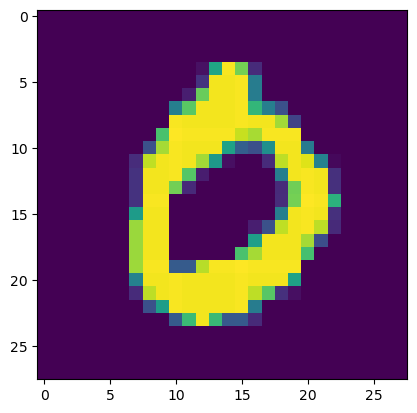

Noisy Handwritten Digit: 


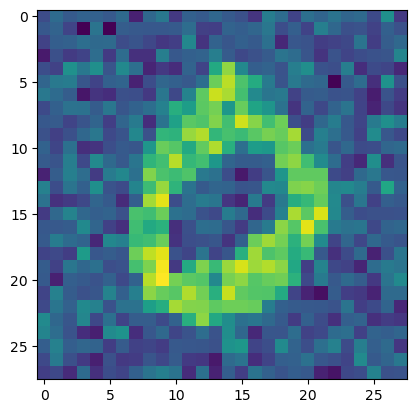

In [12]:
n = int(random.random() * 10)
print("Original Handwritten Digit: ")
plt.imshow(X_test[n])
plt.show()
print("Noisy Handwritten Digit: ")
plt.imshow(noisy_images[n])

In [24]:
encoder = Sequential([
    Flatten(input_shape=[28, 28]),
    
    GaussianNoise(0.2),
    
    Dense(800, activation='relu'),
    Dense(400, activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(25, activation='relu')
])

In [25]:
decoder = Sequential([
    Dense(50, input_shape=[25], activation='relu'),
    Dense(100, activation='relu'),
    Dense(200, activation='relu'),
    Dense(400, activation='relu'),
    Dense(800, activation='relu'),
    Dense(28 * 28, activation='sigmoid'),
    Reshape([28, 28])
])

In [26]:
autoencoder = Sequential([encoder, decoder])

In [27]:
autoencoder.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 25)                1055025   
                                                                 
 sequential_4 (Sequential)   (None, 28, 28)            1055784   
                                                                 
Total params: 2,110,809
Trainable params: 2,110,809
Non-trainable params: 0
_________________________________________________________________


In [28]:
encoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 gaussian_noise_1 (GaussianN  (None, 784)              0         
 oise)                                                           
                                                                 
 dense_12 (Dense)            (None, 800)               628000    
                                                                 
 dense_13 (Dense)            (None, 400)               320400    
                                                                 
 dense_14 (Dense)            (None, 200)               80200     
                                                                 
 dense_15 (Dense)            (None, 100)               20100     
                                                      

In [29]:
decoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 50)                1300      
                                                                 
 dense_19 (Dense)            (None, 100)               5100      
                                                                 
 dense_20 (Dense)            (None, 200)               20200     
                                                                 
 dense_21 (Dense)            (None, 400)               80400     
                                                                 
 dense_22 (Dense)            (None, 800)               320800    
                                                                 
 dense_23 (Dense)            (None, 784)               627984    
                                                                 
 reshape_1 (Reshape)         (None, 28, 28)           

In [30]:
autoencoder.compile(optimizer=SGD(learning_rate=1.5), loss='binary_crossentropy')

In [31]:
autoencoder.fit(X_train, X_train, validation_data=[X_test, X_test], epochs=15)

Epoch 1/15
1875/1875 [==============================] - 52s 27ms/step - loss: 0.2550 - val_loss: 0.2243
Epoch 2/15
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2052 - val_loss: 0.1786
Epoch 3/15
1875/1875 [==============================] - 44s 24ms/step - loss: 0.1686 - val_loss: 0.1548
Epoch 4/15
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1527 - val_loss: 0.1439
Epoch 5/15
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1451 - val_loss: 0.1400
Epoch 6/15
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1404 - val_loss: 0.1350
Epoch 7/15
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1372 - val_loss: 0.1339
Epoch 8/15
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1347 - val_loss: 0.1315
Epoch 9/15
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1329 - val_loss: 0.1307
Epoch 10/15
1875/1875 [==============================] - 45s 24m

In [32]:
denoised_images = autoencoder.predict(noisy_images)

313/313 [==============================] - 4s 9ms/step


Noisy Handwritten Digit's image: 


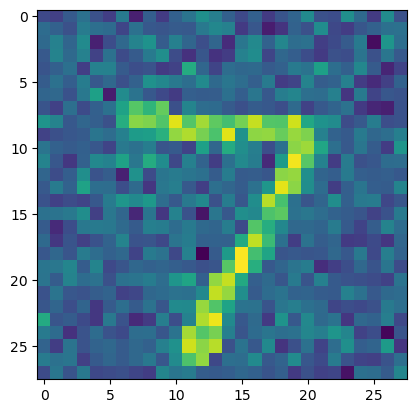

Denoised Digit's image by the AutoEncoder


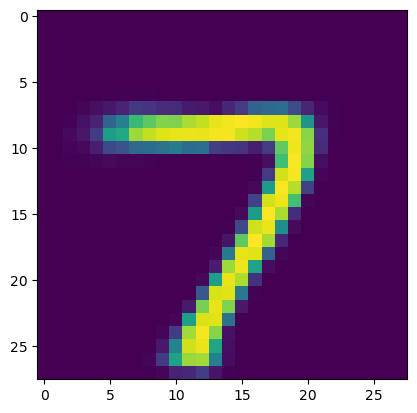

In [33]:
n = int(random.random() * 10)
print("Noisy Handwritten Digit's image: ")
plt.imshow(noisy_images[n])
plt.show()
print("Denoised Digit's image by the AutoEncoder")
plt.imshow(denoised_images[n])

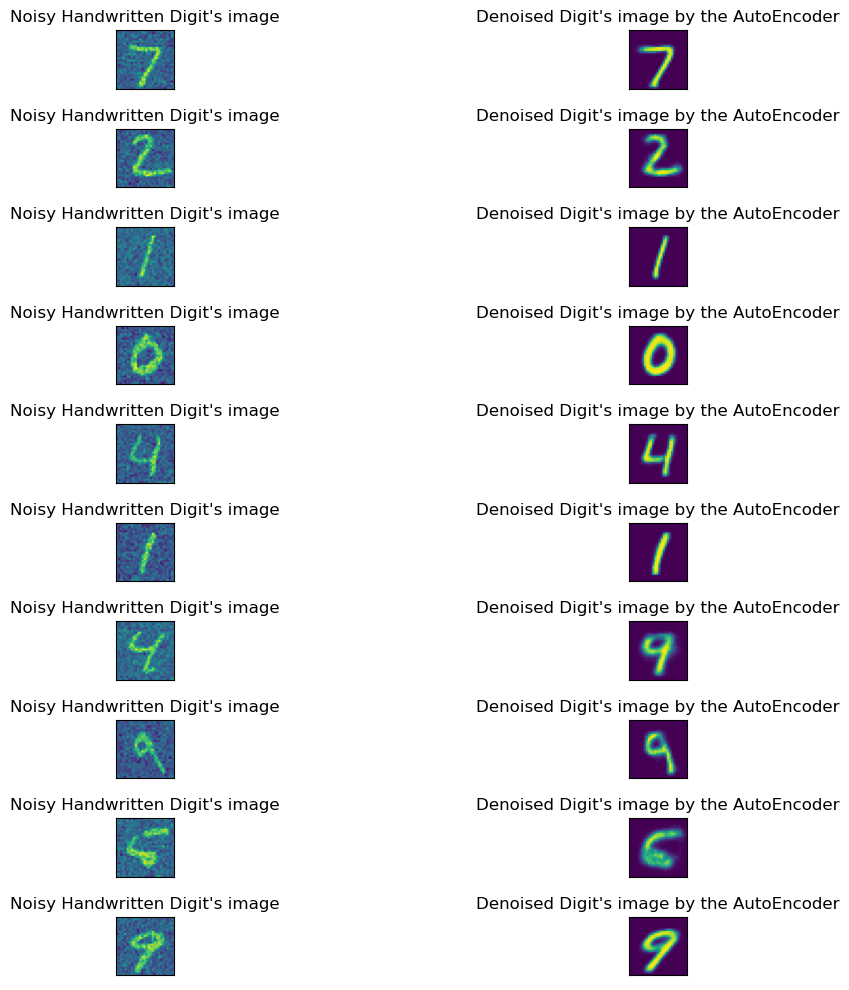

In [36]:
fig, axes = plt.subplots(10, 2, figsize=(15, 10))

for i in range(10):
    axes[i, 0].imshow(noisy_images[i])
    axes[i, 0].set_title("Noisy Handwritten Digit's image")
    axes[i, 0].set_xticks([])
    axes[i, 0].set_yticks([])

    axes[i, 1].imshow(denoised_images[i])
    axes[i, 1].set_title("Denoised Digit's image by the AutoEncoder")
    axes[i, 1].set_xticks([])
    axes[i, 1].set_yticks([])

plt.tight_layout()
plt.show()